for this case, we will use tanh as the activation and see if anything changes

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import make_moons
import pandas as pd

X, y = make_moons(n_samples=200, noise=0.1)
df = pd.DataFrame({
    'X': X[:, 0],
    'Y': X[:, 1],
    'class': y.astype(float)
})
df.to_csv('ushape.csv', index=False)


In [22]:
df.head()

,X,Y,class
0,0.621699,-0.433033,1.0
1,-0.293262,0.827319,0.0
2,-0.855921,0.777319,0.0
3,0.319287,-0.236585,1.0
4,-1.044864,0.088358,0.0


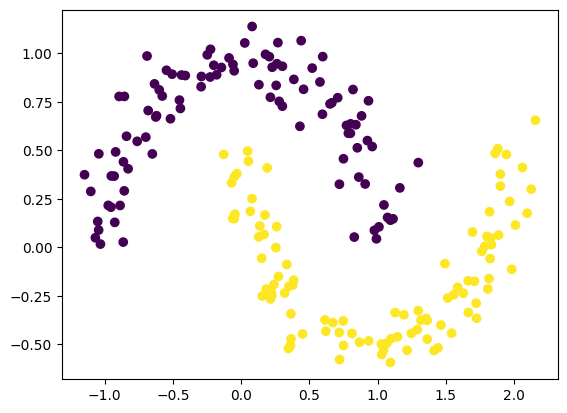

In [23]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [24]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [25]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [26]:
model= Sequential()
model.add(Dense(2,activation='tanh',input_dim=2)) #hidden laye 1 and input layer
model.add(Dense(1,activation='tanh'))
model.add(Dense(1,activation='tanh'))
model.add(Dense(1,activation='tanh'))
model.add(Dense(1,activation='sigmoid')) #output sigmoid->binary classification

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.get_weights()
#these are the inital weights

[array([[-0.8262779 , -0.74220526],
        [-0.10179651, -1.0534896 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.19199884],
        [-0.62570906]], dtype=float32),
 array([0.], dtype=float32),
 array([[0.20818496]], dtype=float32),
 array([0.], dtype=float32),
 array([[-0.6719321]], dtype=float32),
 array([0.], dtype=float32),
 array([[-1.1017163]], dtype=float32),
 array([0.], dtype=float32)]

In [29]:
initial_weights= model.get_weights()

In [30]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0], model.get_weights()[0].shape[1]) * 0.01
initial_weights[1] = np.zeros(model.get_weights()[1].shape)

initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0], model.get_weights()[2].shape[1]) * 0.01
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0], model.get_weights()[4].shape[1]) * 0.01
initial_weights[5] = np.zeros(model.get_weights()[5].shape)

initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0], model.get_weights()[6].shape[1]) * 0.01
initial_weights[7] = np.zeros(model.get_weights()[7].shape)

initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0], model.get_weights()[8].shape[1]) * 0.01
initial_weights[9] = np.zeros(model.get_weights()[9].shape)


In [31]:
model.set_weights(initial_weights)

In [32]:
print(initial_weights)

[array([[ 0.00358753, -0.00032811],
       [ 0.02032683,  0.00428647]]), array([0., 0.]), array([[ 0.00355244],
       [-0.00177029]]), array([0.]), array([[-0.00471124]]), array([0.]), array([[0.01434765]]), array([0.]), array([[-0.01666207]]), array([0.])]


In [33]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history= model.fit(X,y,epochs=100,validation_steps=0.2)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5087 - loss: 0.6932
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4947 - loss: 0.6932
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5286 - loss: 0.6931
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4770 - loss: 0.6932
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5033 - loss: 0.6931
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4984 - loss: 0.6932
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5188 - loss: 0.6931
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5114 - loss: 0.6931 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4982 - loss: 0.6932
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5041 - loss: 0.6931
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4910 - loss: 0.6932
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5042 - l

In [35]:
model.get_weights() # new weights after training

[array([[ 0.00376455, -0.00042864],
        [ 0.02019297,  0.00436254]], dtype=float32),
 array([ 6.6218996e-07, -2.4469199e-07], dtype=float32),
 array([[ 0.00292459],
        [-0.00196711]], dtype=float32),
 array([0.00012817], dtype=float32),
 array([[-0.00426069]], dtype=float32),
 array([0.00037683], dtype=float32),
 array([[0.00333345]], dtype=float32),
 array([-1.5688855e-06], dtype=float32),
 array([[-7.5900397e-07]], dtype=float32),
 array([-0.00036287], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


<Axes: >

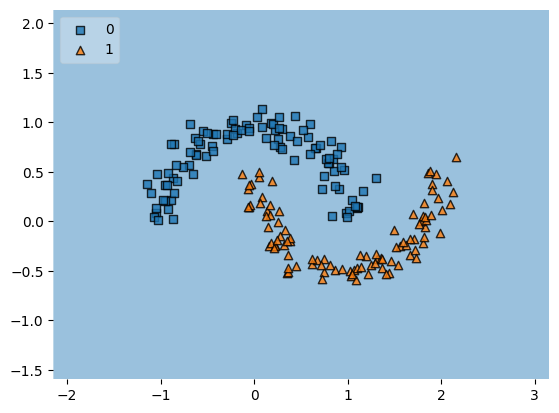

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [37]:
# if we see, bluepoints= 0,   yellow points =1
#meainig, it is telling even the blue points are yellow and not recognizing them